# Herramientas Compmutacionales

***

## Raices: 

***

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def function(x):
    return x**3-4*x**2-2

In [4]:
def deriv_function(x):
    delta = 1e-5
    return (function(x+delta)-function(x-delta))/(2*delta)

In [5]:
def next_point(x):
    return x - function(x)/deriv_function(x)

In [6]:
def Newton_Method(x_start,i_top):
    i=0.0
    x_result=0.0
    epsilon = 1e-6
    while i < i_top:
        x=x_start
        x_start=next_point(x_start)
        if np.absolute(x_start-x) < epsilon:
            x_result = x_start
            break
        i=i+1
    return x_result      

In [7]:
root = Newton_Method(1,61)
print("Newton: root = {:.4f}".format(root))

Newton: root = 4.1179


### Bisection Method and Scipy

In [8]:
#import numpy as np

In [9]:
# define an interval
# a always left
# b always right

a=0
b=5

In [10]:
def function(x):
    return x**3-4*x**2-2

In [15]:
def Bisection_Method(a,b):
    epsilon = 1e-5
    ya=function(a)
    yb=function(b)
    c = (a+b)/2
    yc=function(c)
    if np.abs(a-b) < epsilon:
        return min(a,b)
    elif ya*yc > 0:
        a = c
        return Bisection_Method(a,b)
    else:
        b = c  
        return Bisection_Method(a,b)

In [16]:
root = Bisection_Method(a,b)
print("Biseccion: x_raiz = {:.4f}".format(root))

Biseccion: x_raiz = 4.1179


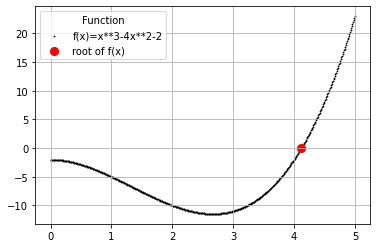

In [24]:
x = np.linspace(0,5,500)
y = x**3-4*x**2-2

plt.figure()
plt.grid(True)
plt.scatter(x,y,s=0.55,c='black',label="f(x)=x**3-4x**2-2")
plt.scatter(root,0,s=65,c='red',label='root of f(x)')
plt.legend()
plt.legend(loc=2,frameon=True,title='Function')
plt.show()

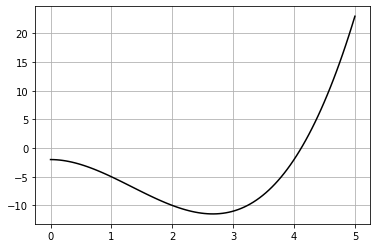

In [20]:
plt.figure()
plt.grid(True)
plt.plot(x,y,'-k')
plt.show()

## Normal Distribution

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

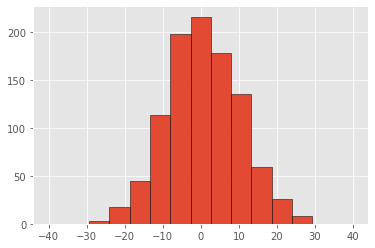

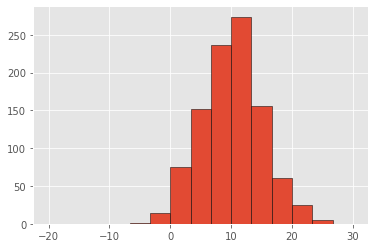

In [36]:
import matplotlib
matplotlib.style.use('ggplot')

np.random.seed(4)

data = np.round(np.random.normal(0, 10, 1000))
data2= np.round(np.random.normal(10, 5, 1000))

#fig, axes = plt.subplots(1,2)
plt.hist(data,bins=15,range=(-40,40),edgecolor='black')
plt.show()
plt.hist(data2,bins=15,range=(-20,30),edgecolor='black')
plt.show()

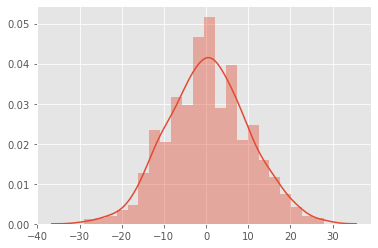

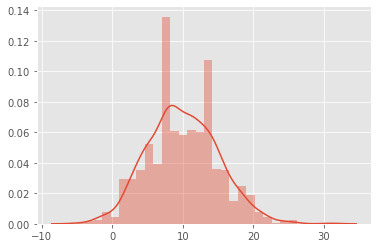

In [35]:
import seaborn as sns
sns.distplot(data)
plt.show()
sns.distplot(data2)
plt.show()

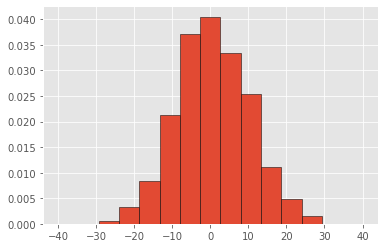

In [39]:
plt.hist(data,bins=15, density=True, range=(-40,40),edgecolor='black')
plt.show()

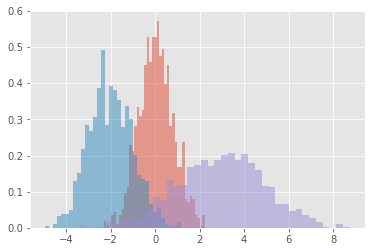

In [43]:
np.random.seed(4)

data1 = np.random.normal(0, 0.8, 1000)
data2 = np.random.normal(-2, 1, 1000)
data3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='barstacked', alpha=0.5, density=True, bins=40)

plt.hist(data1, **kwargs)
plt.hist(data2, **kwargs)
plt.hist(data3, **kwargs);

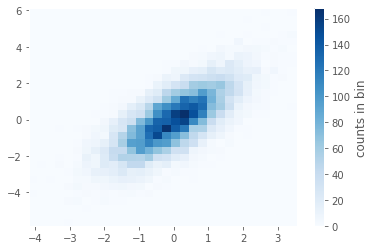

In [44]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

## Regresion Lineal Y Mínimos Cuadrados

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.linear_model import LinearRegression

In [19]:
import random
def lista_aleatorios(n):
    x = [0] * n
    for i in range(n):
        x[i] = random.randint(0, 51)
    return x
x=lista_aleatorios(50)
y=lista_aleatorios(50)

In [27]:
#Object Linear Regression
linearModel = LinearRegression()

In [24]:
x=np.array(x)
y=np.array(y)
x = x.reshape(-1,1)

In [28]:
linearModel.fit(x,y)

LinearRegression()

In [30]:
y_prediction = linearModel.predict(x)

In [31]:
y_prediction

array([26.29464382, 27.85681684, 18.2885071 , 22.97502616, 21.21758151,
       18.2885071 , 18.48377873, 26.68518708, 26.0993722 , 26.48991545,
       27.66154522, 26.88045871, 27.07573033, 22.19393965, 21.41285314,
       27.07573033, 20.24122338, 21.99866802, 25.31828569, 19.46013687,
       28.05208847, 20.24122338, 24.7324708 , 23.75611267, 20.63176663,
       22.19393965, 20.63176663, 28.05208847, 23.9513843 , 21.60812477,
       23.56084104, 27.07573033, 18.09323547, 20.04595175, 18.09323547,
       21.80339639, 21.99866802, 24.53719918, 21.21758151, 27.27100196,
       24.34192755, 21.21758151, 22.38921128, 18.09323547, 25.31828569,
       20.436495  , 26.48991545, 26.88045871, 18.09323547, 22.19393965])

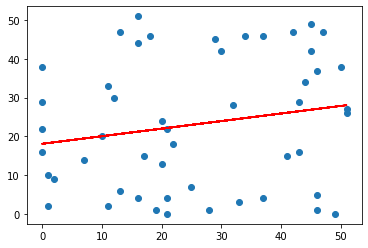

In [32]:
#Plot
plt.figure()
plt.scatter(x,y)
plt.plot(x,y_prediction, c='red')
plt.show()

In [41]:
m = linearModel.coef_
c = linearModel.intercept_
print('La ecuacion de la aproximacion lineal es y={:.3f}x+{:.3f}'.format(m[0],c))

La ecuacion de la aproximacion lineal es y=0.195x+18.093


In [42]:
x=np.linspace(0,50,100)
y=m[0]*x+c

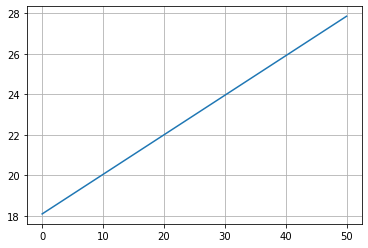

In [45]:
plt.grid(True)
plt.plot(x,y)
plt.show()

In [47]:
# Error R2
from sklearn.metrics import r2_score

In [48]:
def lista_aleatorios(n):
    x = [0] * n
    for i in range(n):
        x[i] = random.randint(0, 51)
    return x
x=lista_aleatorios(50)
y=lista_aleatorios(50)

r2_score(y, y_prediction)

-0.11701402913942882

In [49]:
x = np.array([1,2,6,7,10,12,13,20,25])
y = np.array([2,2,8,10,11,15,20,18,22])

In [50]:
ln_reg = LinearRegression()

In [59]:
x=x.reshape(-1,1)
x

array([[ 1],
       [ 2],
       [ 6],
       [ 7],
       [10],
       [12],
       [13],
       [20],
       [25]])

In [53]:
ln_reg.fit(x,y)

LinearRegression()

In [56]:
y_pred = linearModel.predict(x)

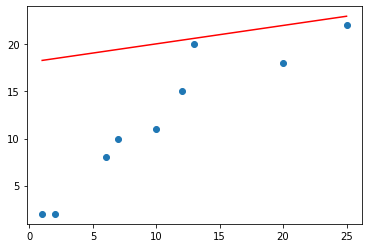

In [58]:
plt.scatter(x,y)
plt.plot(x,y_pred,c='red')
plt.show()

In [60]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

-1.0515015701148696

#### Better Example

In [61]:
x = np.array([i for i in range(0,6)])
y = np.array([0,0.2,0.8,1.2,1.5,1.9])
print(x,y)

[0 1 2 3 4 5] [0.  0.2 0.8 1.2 1.5 1.9]


In [62]:
from scipy.interpolate import *

In [64]:
p1 = np.polyfit(x,y,1)
print(p1)

[ 0.39428571 -0.05238095]


In [67]:
x_p = np.linspace(0,6,100)
y_p = p1[0]*x_p+p1[1]

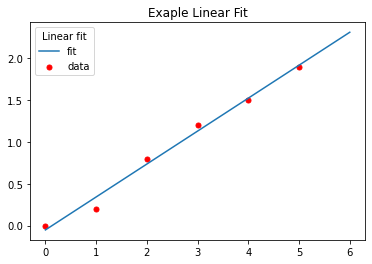

In [71]:
plt.title("Exaple Linear Fit")
plt.scatter(x,y, s=25,c='red',label='data')
plt.plot(x_p,y_p,label='fit')
plt.legend()
plt.legend(loc=2,frameon=True,title='Linear fit')
plt.show()